In [1]:
!pip install networkx

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
var1=yf.Ticker('AAPL')

In [7]:
apple=var1.institutional_holders
apple

Holder   Shares Date Reported   % Out  \
0                 Vanguard Group Inc    1.32B    2024-03-31  0.0860   
1                     Blackrock Inc.    1.04B    2024-03-31  0.0679   
2            Berkshire Hathaway, Inc  789.37M    2024-03-31  0.0515   
3           State Street Corporation  588.59M    2024-03-31  0.0384   
4      Geode Capital Management, LLC  307.72M    2024-03-31  0.0201   
5                           FMR, LLC  288.98M    2024-03-31  0.0188   
6                     Morgan Stanley  221.96M    2024-03-31  0.0145   
7      Price (T.Rowe) Associates Inc  206.97M    2024-03-31  0.0135   
8  Norges Bank Investment Management  176.14M    2023-12-31  0.0115   
9          JP Morgan Chase & Company  156.06M    2024-03-31  0.0102   

          Value  
0  253682654802  
1  200144683494  
2  151835026175  
3  113215439933  
4   59190107760  
5   55585192816  
6   42693865400  
7   39811024300  
8   33880761472  
9   30017895167

In [10]:
apple['comp']=var1.ticker

In [12]:
var2=yf.Ticker('MSFT')

In [14]:
msft=var2.institutional_holders
msft

Holder   Shares Date Reported   % Out  \
0                 Vanguard Group Inc  667.99M    2024-03-31  0.0899   
1                     Blackrock Inc.  546.02M    2024-03-31  0.0735   
2           State Street Corporation  300.35M    2024-03-31  0.0404   
3                           FMR, LLC  220.86M    2024-03-31  0.0297   
4      Geode Capital Management, LLC  157.59M    2024-03-31  0.0212   
5      Price (T.Rowe) Associates Inc   142.2M    2024-03-31  0.0191   
6          JP Morgan Chase & Company  127.74M    2024-03-31  0.0172   
7                     Morgan Stanley  122.19M    2024-03-31  0.0164   
8  Norges Bank Investment Management   95.52M    2023-12-31  0.0129   
9    Capital International Investors   83.57M    2024-03-31  0.0112   

          Value  
0  286593164491  
1  234264364971  
2  128863981834  
3   94757645859  
4   67611847755  
5   61009782249  
6   54806064945  
7   52423162150  
8   40982707782  
9   35855332586

In [15]:
msft['comp']=var2.ticker

In [17]:
tog_=pd.concat([apple,msft])

In [18]:
G=nx.from_pandas_edgelist(tog_,'Holder','comp')

In [19]:
G.nodes()

NodeView(('Vanguard Group Inc', 'AAPL', 'Blackrock Inc.', 'Berkshire Hathaway, Inc', 'State Street Corporation', 'Geode Capital Management, LLC', 'FMR, LLC', 'Morgan Stanley', 'Price (T.Rowe) Associates Inc', 'Norges Bank Investment Management', 'JP Morgan Chase & Company', 'MSFT', 'Capital International Investors'))

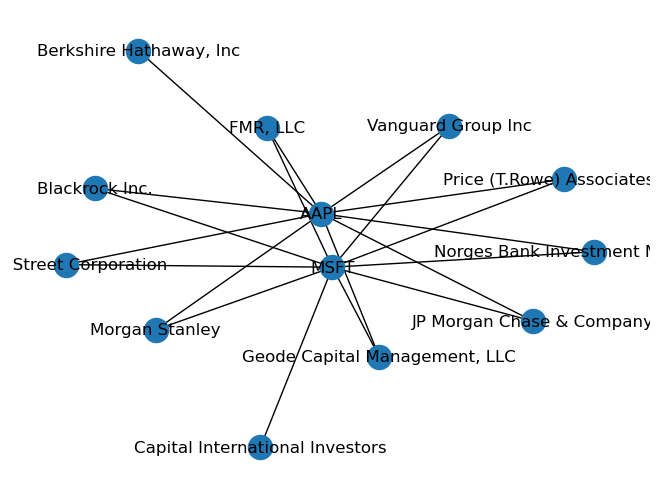

In [22]:
nx.draw(G,with_labels=True)

## Getting all tickers of Dow Jone IA


In [30]:
tickers=pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
tickers=tickers.Symbol.to_list()

In [31]:
frames=[]

for ticker in tickers:
    var=yf.Ticker(ticker)
    frame= var.institutional_holders
    frame['comp']=var.ticker
    frames.append(frame)

In [32]:
all_tog=pd.concat(frames)

In [33]:
all_tog

Holder  Shares Date Reported   % Out  \
0                          Vanguard Group Inc  49.46M    2024-03-31  0.0894   
1                              Blackrock Inc.  40.59M    2024-03-31  0.0734   
2                    State Street Corporation  33.96M    2024-03-31  0.0614   
3               Geode Capital Management, LLC   11.1M    2024-03-31  0.0201   
4   State Farm Mutual Automobile Insurance Co   8.28M    2024-03-31  0.0150   
..                                        ...     ...           ...     ...   
5           Norges Bank Investment Management  69.93M    2023-12-31  0.0087   
6                 Bank of America Corporation  67.04M    2024-03-31  0.0083   
7               Price (T.Rowe) Associates Inc  56.86M    2024-03-31  0.0071   
8                                    FMR, LLC  55.59M    2024-03-31  0.0069   
9                Fisher Asset Management, LLC   43.2M    2024-03-31  0.0054   

         Value comp  
0   5063606832  MMM  
1   4155819349  MMM  
2   3476173428  MMM  
3   1136390755  MMM  
4    847370160  MMM  
..         ...  ...  
5   4536150086  WMT  
6   4348931495  WMT  
7   3688588405  WMT  
8   3606441575  WMT  
9   2802106345  WMT  

[300 rows x 6 columns]

In [35]:
G= nx.from_pandas_edgelist(all_tog,'Holder','comp',edge_attr=True)

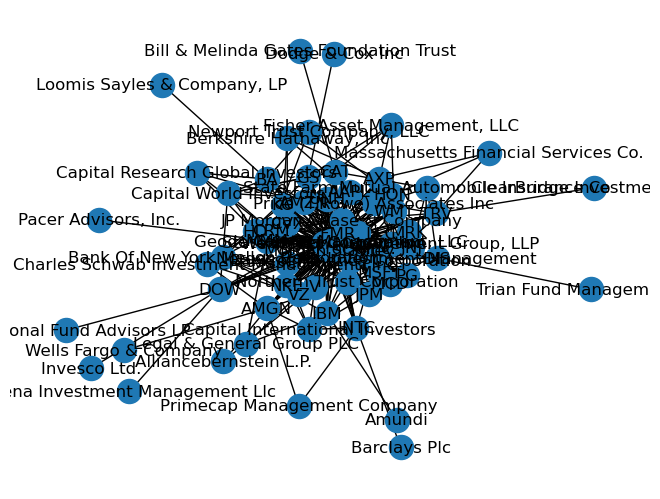

In [36]:
nx.draw(G,with_labels=True)

In [45]:
colors=[]
for node in G:
    if node in all_tog['comp'].values:
        colors.append('red')
    else:
        colors.append('yellow')

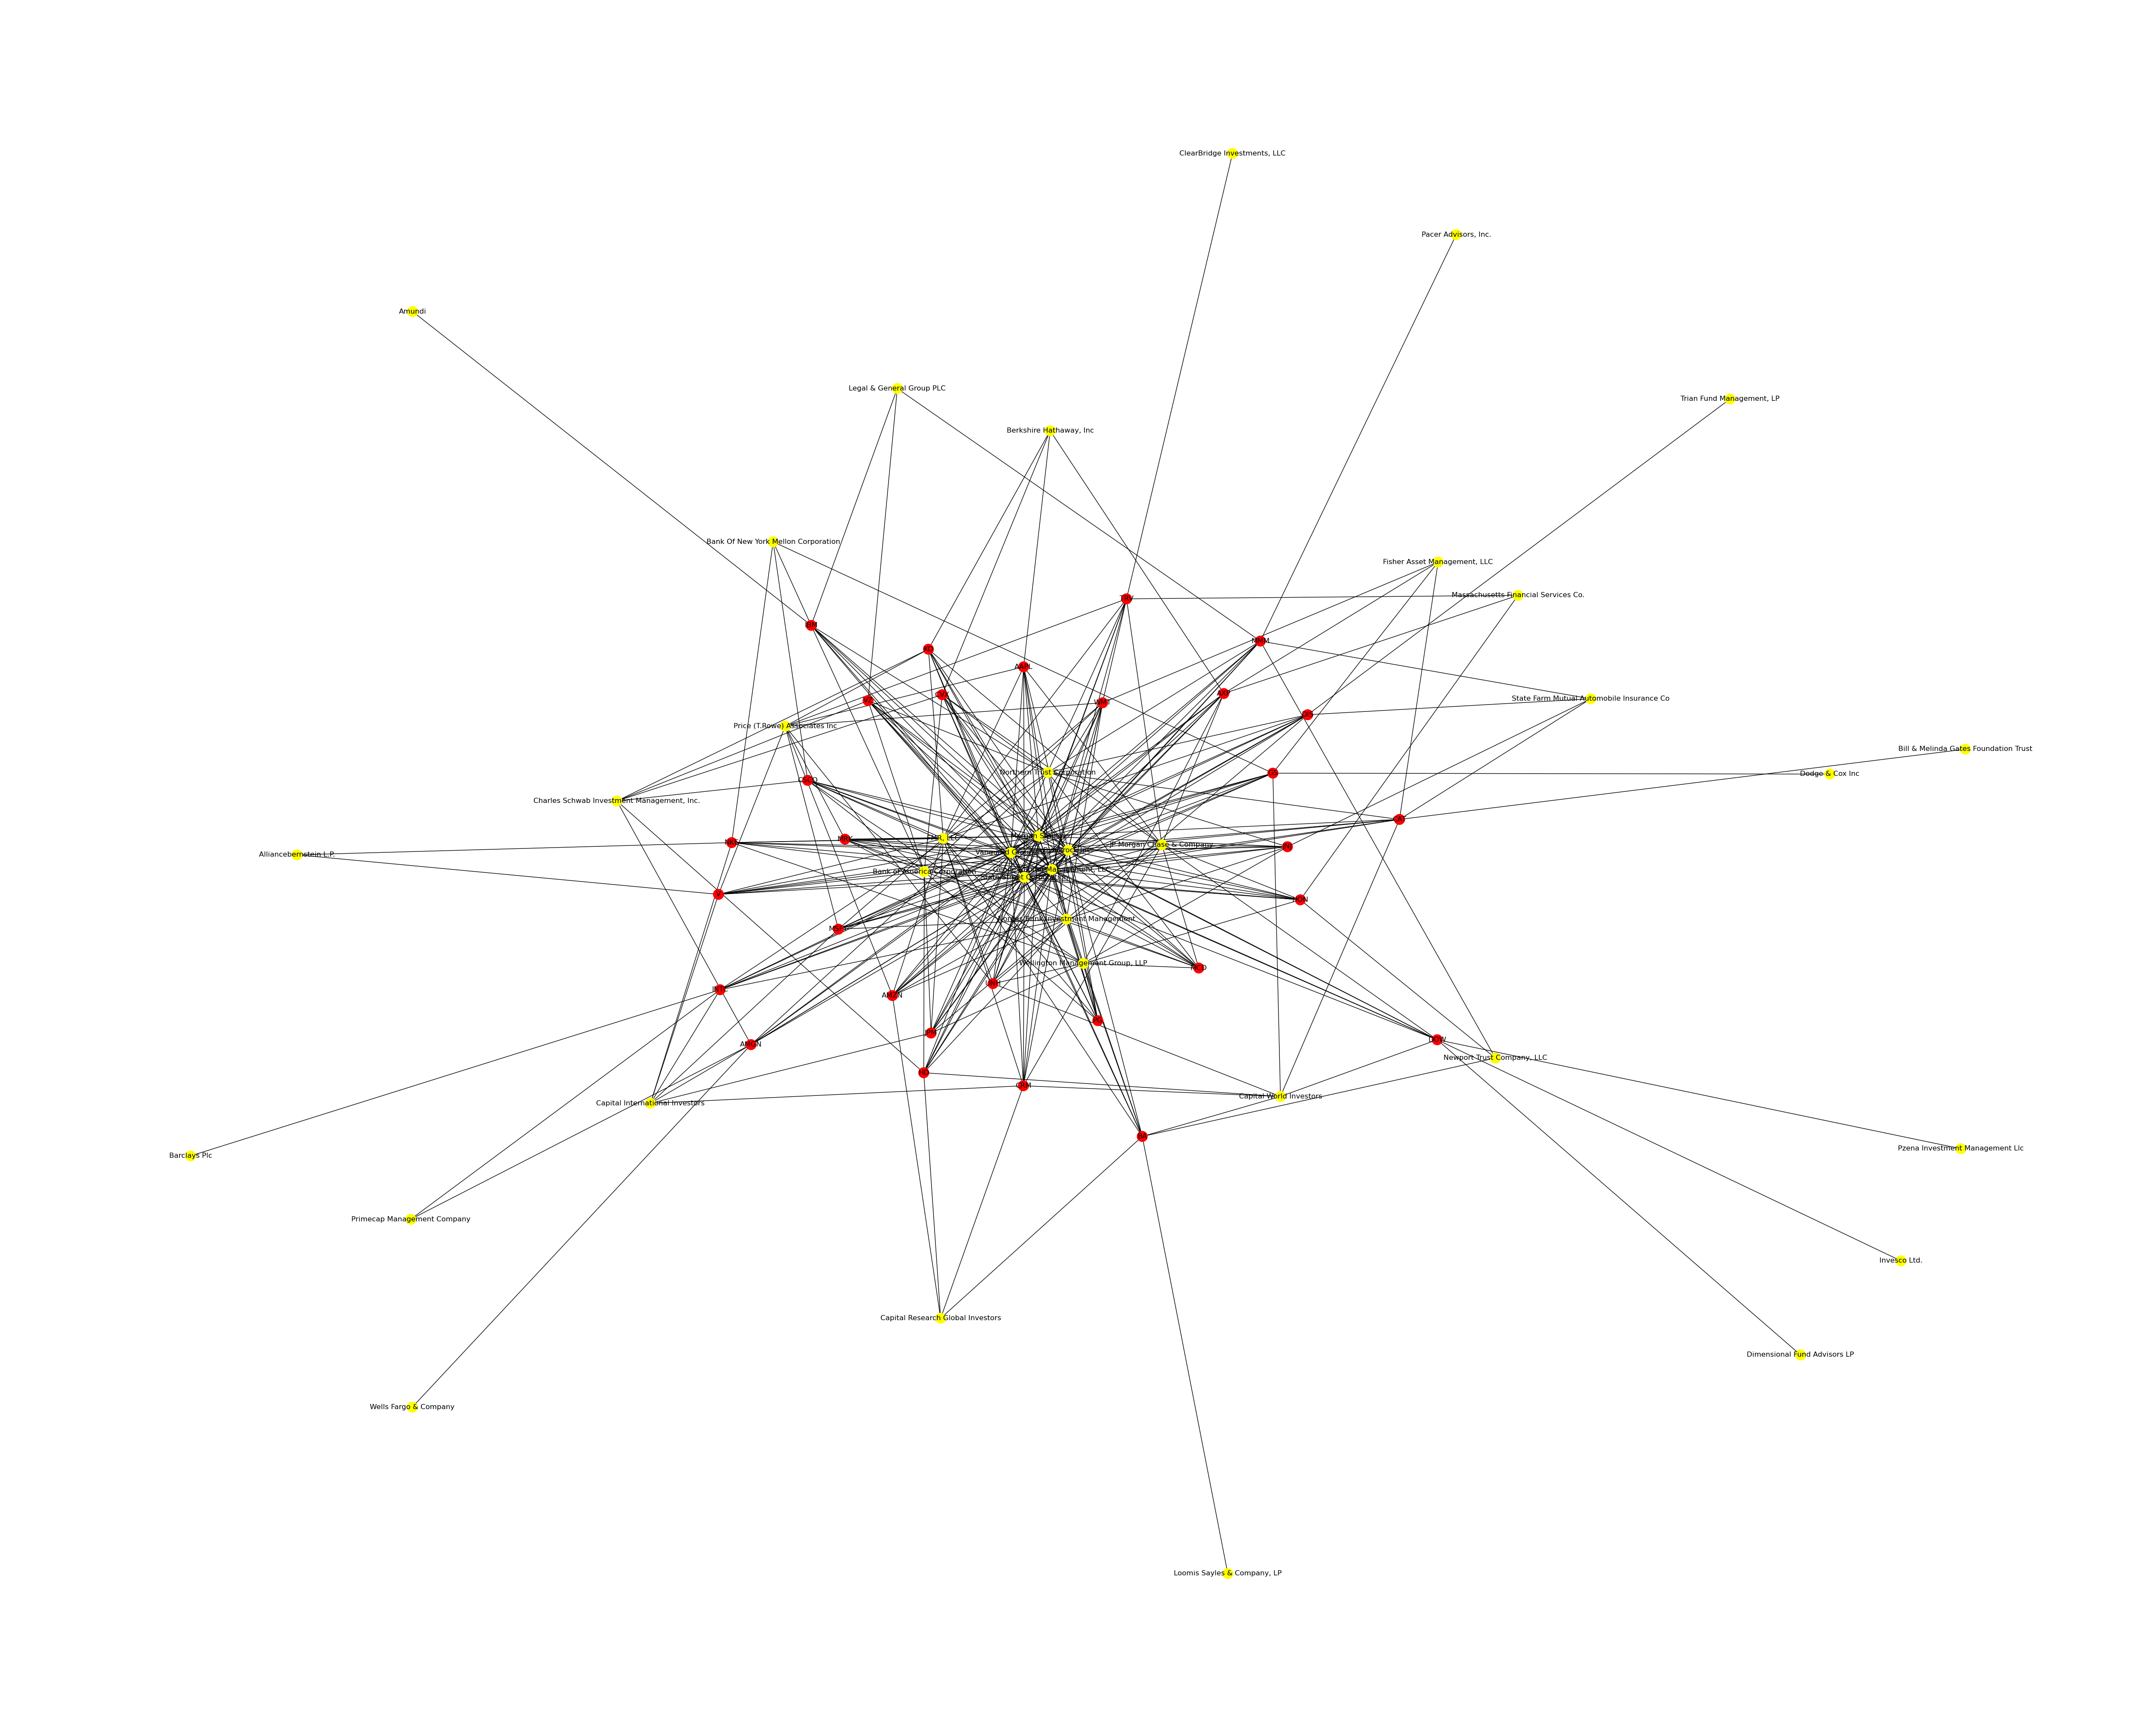

In [46]:
#clean the above figure

plt.figure(figsize=(50,40))
nx.draw(G,with_labels=True,node_color=colors)

## In above figure , Institional holders are yellow and companies are red

In [48]:
dict(G.degree()) #degree is the no of relationships of a particular node.

{'Vanguard Group Inc': 30,
 'MMM': 10,
 'Blackrock Inc.': 30,
 'State Street Corporation': 30,
 'Geode Capital Management, LLC': 30,
 'State Farm Mutual Automobile Insurance Co': 4,
 'Morgan Stanley': 30,
 'Newport Trust Company, LLC': 3,
 'Northern Trust Corporation': 11,
 'Legal & General Group PLC': 3,
 'Pacer Advisors, Inc.': 1,
 'Berkshire Hathaway, Inc': 4,
 'AXP': 10,
 'Wellington Management Group, LLP': 10,
 'JP Morgan Chase & Company': 13,
 'Massachusetts Financial Services Co.': 3,
 'Fisher Asset Management, LLC': 4,
 'AMGN': 10,
 'Primecap Management Company': 2,
 'Charles Schwab Investment Management, Inc.': 6,
 'Wells Fargo & Company': 1,
 'Capital International Investors': 7,
 'AMZN': 10,
 'FMR, LLC': 16,
 'Price (T.Rowe) Associates Inc': 9,
 'Norges Bank Investment Management': 13,
 'Capital Research Global Investors': 4,
 'AAPL': 10,
 'BA': 10,
 'Loomis Sayles & Company, LP': 1,
 'Capital World Investors': 7,
 'CAT': 10,
 'Bill & Melinda Gates Foundation Trust': 1,
 'CV

In [50]:
[v * 100 for v in dict(G.degree()).values() ] 

#multiplies this by 100 to use in node size

[3000,
 1000,
 3000,
 3000,
 3000,
 400,
 3000,
 300,
 1100,
 300,
 100,
 400,
 1000,
 1000,
 1300,
 300,
 400,
 1000,
 200,
 600,
 100,
 700,
 1000,
 1600,
 900,
 1300,
 400,
 1000,
 1000,
 100,
 700,
 1000,
 100,
 1000,
 1300,
 1000,
 400,
 1000,
 1000,
 100,
 1000,
 100,
 100,
 100,
 1000,
 100,
 1000,
 1000,
 1000,
 100,
 1000,
 100,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 200,
 1000,
 1000,
 1000,
 100,
 1000,
 1000,
 1000,
 1000]

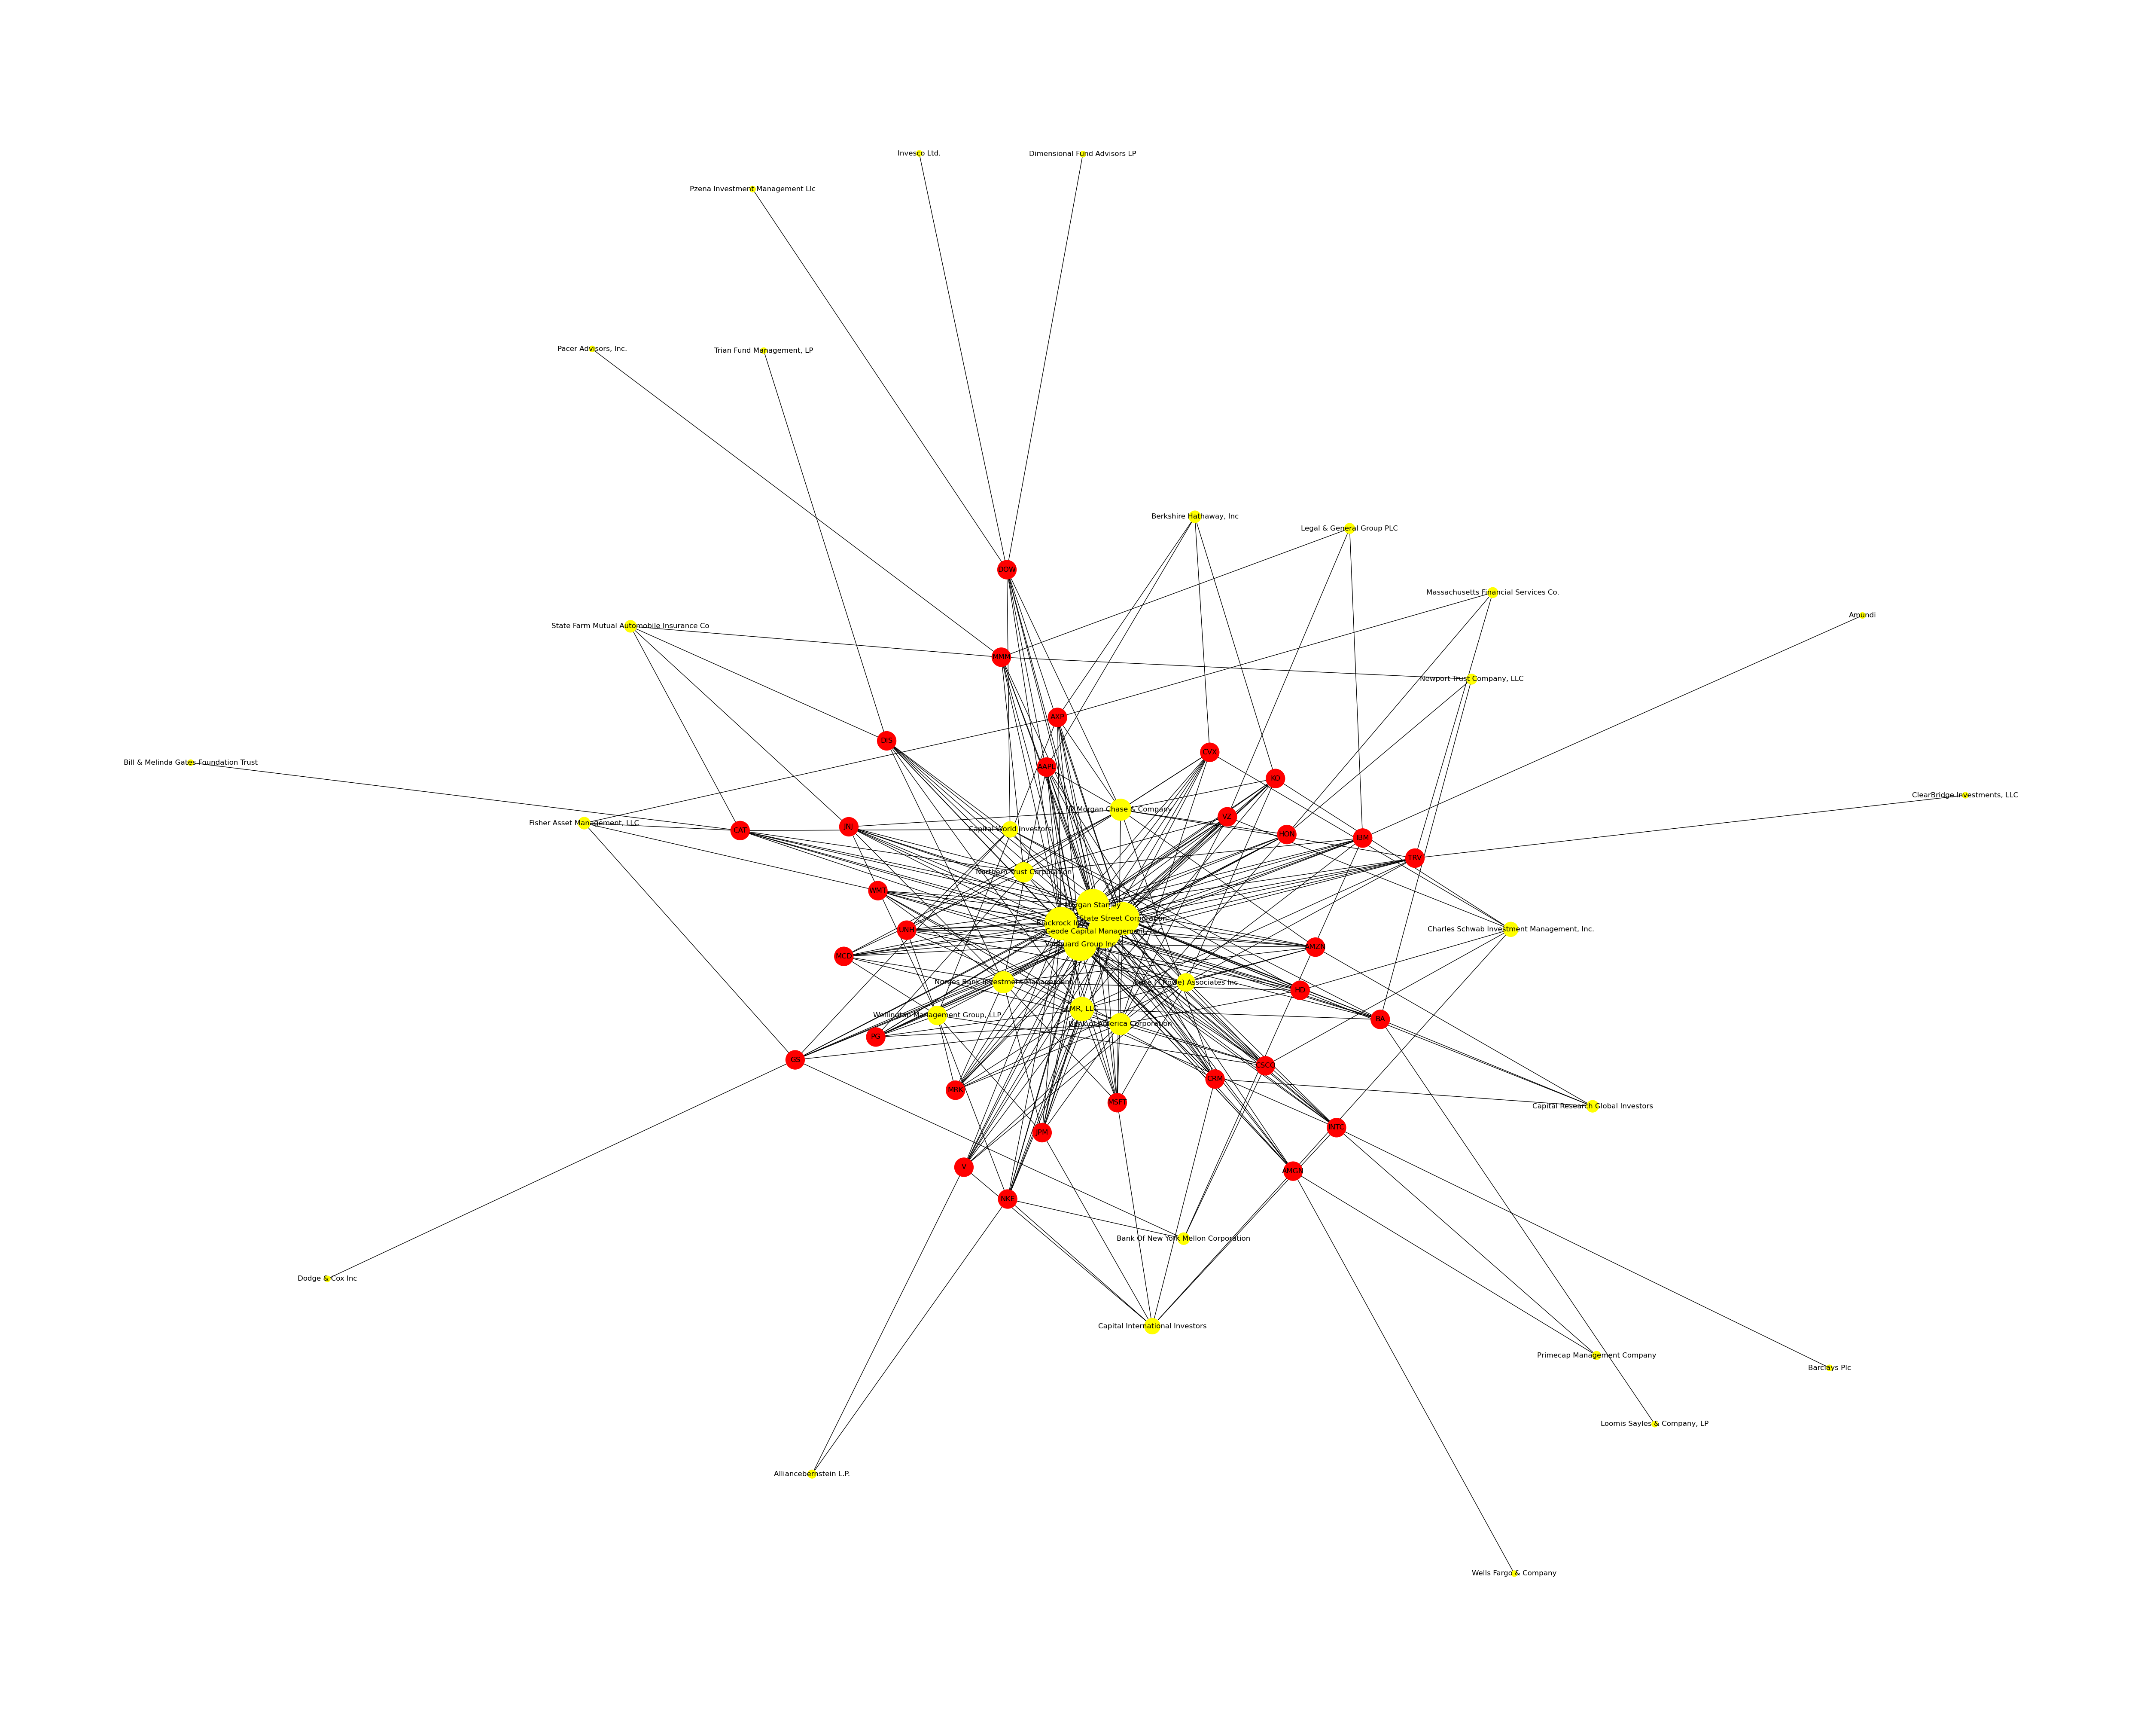

In [51]:
plt.figure(figsize=(50,40))
nx.draw(G,with_labels=True,node_color=colors,node_size=[v * 100 for v in dict(G.degree()).values() ] )

#compnies node size is same, but Inst investor size is different.

In [52]:
G= nx.from_pandas_edgelist(all_tog,'Holder','comp',edge_attr=True)


In [53]:
edgelist=nx.to_edgelist(G)
edgelist

EdgeDataView([('Vanguard Group Inc', 'MMM', {'Shares': '49.46M', 'Date Reported': Timestamp('2024-03-31 00:00:00'), '% Out': 0.0894, 'Value': 5063606832}), ('Vanguard Group Inc', 'AXP', {'Shares': '45.15M', 'Date Reported': Timestamp('2024-03-31 00:00:00'), '% Out': 0.06280000000000001, 'Value': 10967386537}), ('Vanguard Group Inc', 'AMGN', {'Shares': '52.09M', 'Date Reported': Timestamp('2024-03-31 00:00:00'), '% Out': 0.0971, 'Value': 16407786150}), ('Vanguard Group Inc', 'AMZN', {'Shares': '785.81M', 'Date Reported': Timestamp('2024-03-31 00:00:00'), '% Out': 0.0755, 'Value': 144870878451}), ('Vanguard Group Inc', 'AAPL', {'Shares': '1.32B', 'Date Reported': Timestamp('2024-03-31 00:00:00'), '% Out': 0.086, 'Value': 253682654802}), ('Vanguard Group Inc', 'BA', {'Shares': '49.72M', 'Date Reported': Timestamp('2024-03-31 00:00:00'), '% Out': 0.081, 'Value': 9169247284}), ('Vanguard Group Inc', 'CAT', {'Shares': '47.87M', 'Date Reported': Timestamp('2024-03-31 00:00:00'), '% Out': 0.09

In [55]:
[v[2]['Value']/50_000_000_000 for v in edgelist] # dividing by 50 billion so that it can be drawn

[0.10127213664,
 0.21934773074,
 0.328155723,
 2.89741756902,
 5.07365309604,
 0.18338494568,
 0.34346031924,
 0.51132818748,
 0.36145923184,
 0.46318321654,
 0.31630300108,
 0.08410293722,
 0.26536694368,
 0.62872861866,
 0.24808375614,
 0.30634426668,
 0.24847747628,
 0.68837227704,
 1.07785663248,
 0.36729585488,
 0.63347480214,
 5.73186328982,
 0.20213031914,
 0.75216584864,
 0.48306418398,
 0.09183794526,
 0.88172261942,
 0.27960866594,
 0.7827884767,
 0.53419841894,
 0.08311638698,
 0.06952346856,
 0.0227278151,
 0.0169474032,
 0.01646712316,
 0.01597444348,
 0.01299609264,
 0.01041305674,
 0.00994171404,
 0.20922046622,
 0.3022177599,
 2.3543905738,
 4.00289366988,
 0.13708765766,
 0.24062078184,
 0.40979297782,
 0.32954989934,
 0.38729413142,
 0.2503167027,
 0.05528823288,
 0.21757109432,
 0.47302152324,
 0.17160735684,
 0.26099474266,
 0.21963524686,
 0.57047043212,
 0.7798231457,
 0.27003672562,
 0.53906828946,
 4.68528729942,
 0.16373571232,
 0.52941422044,
 0.4136068174,
 0

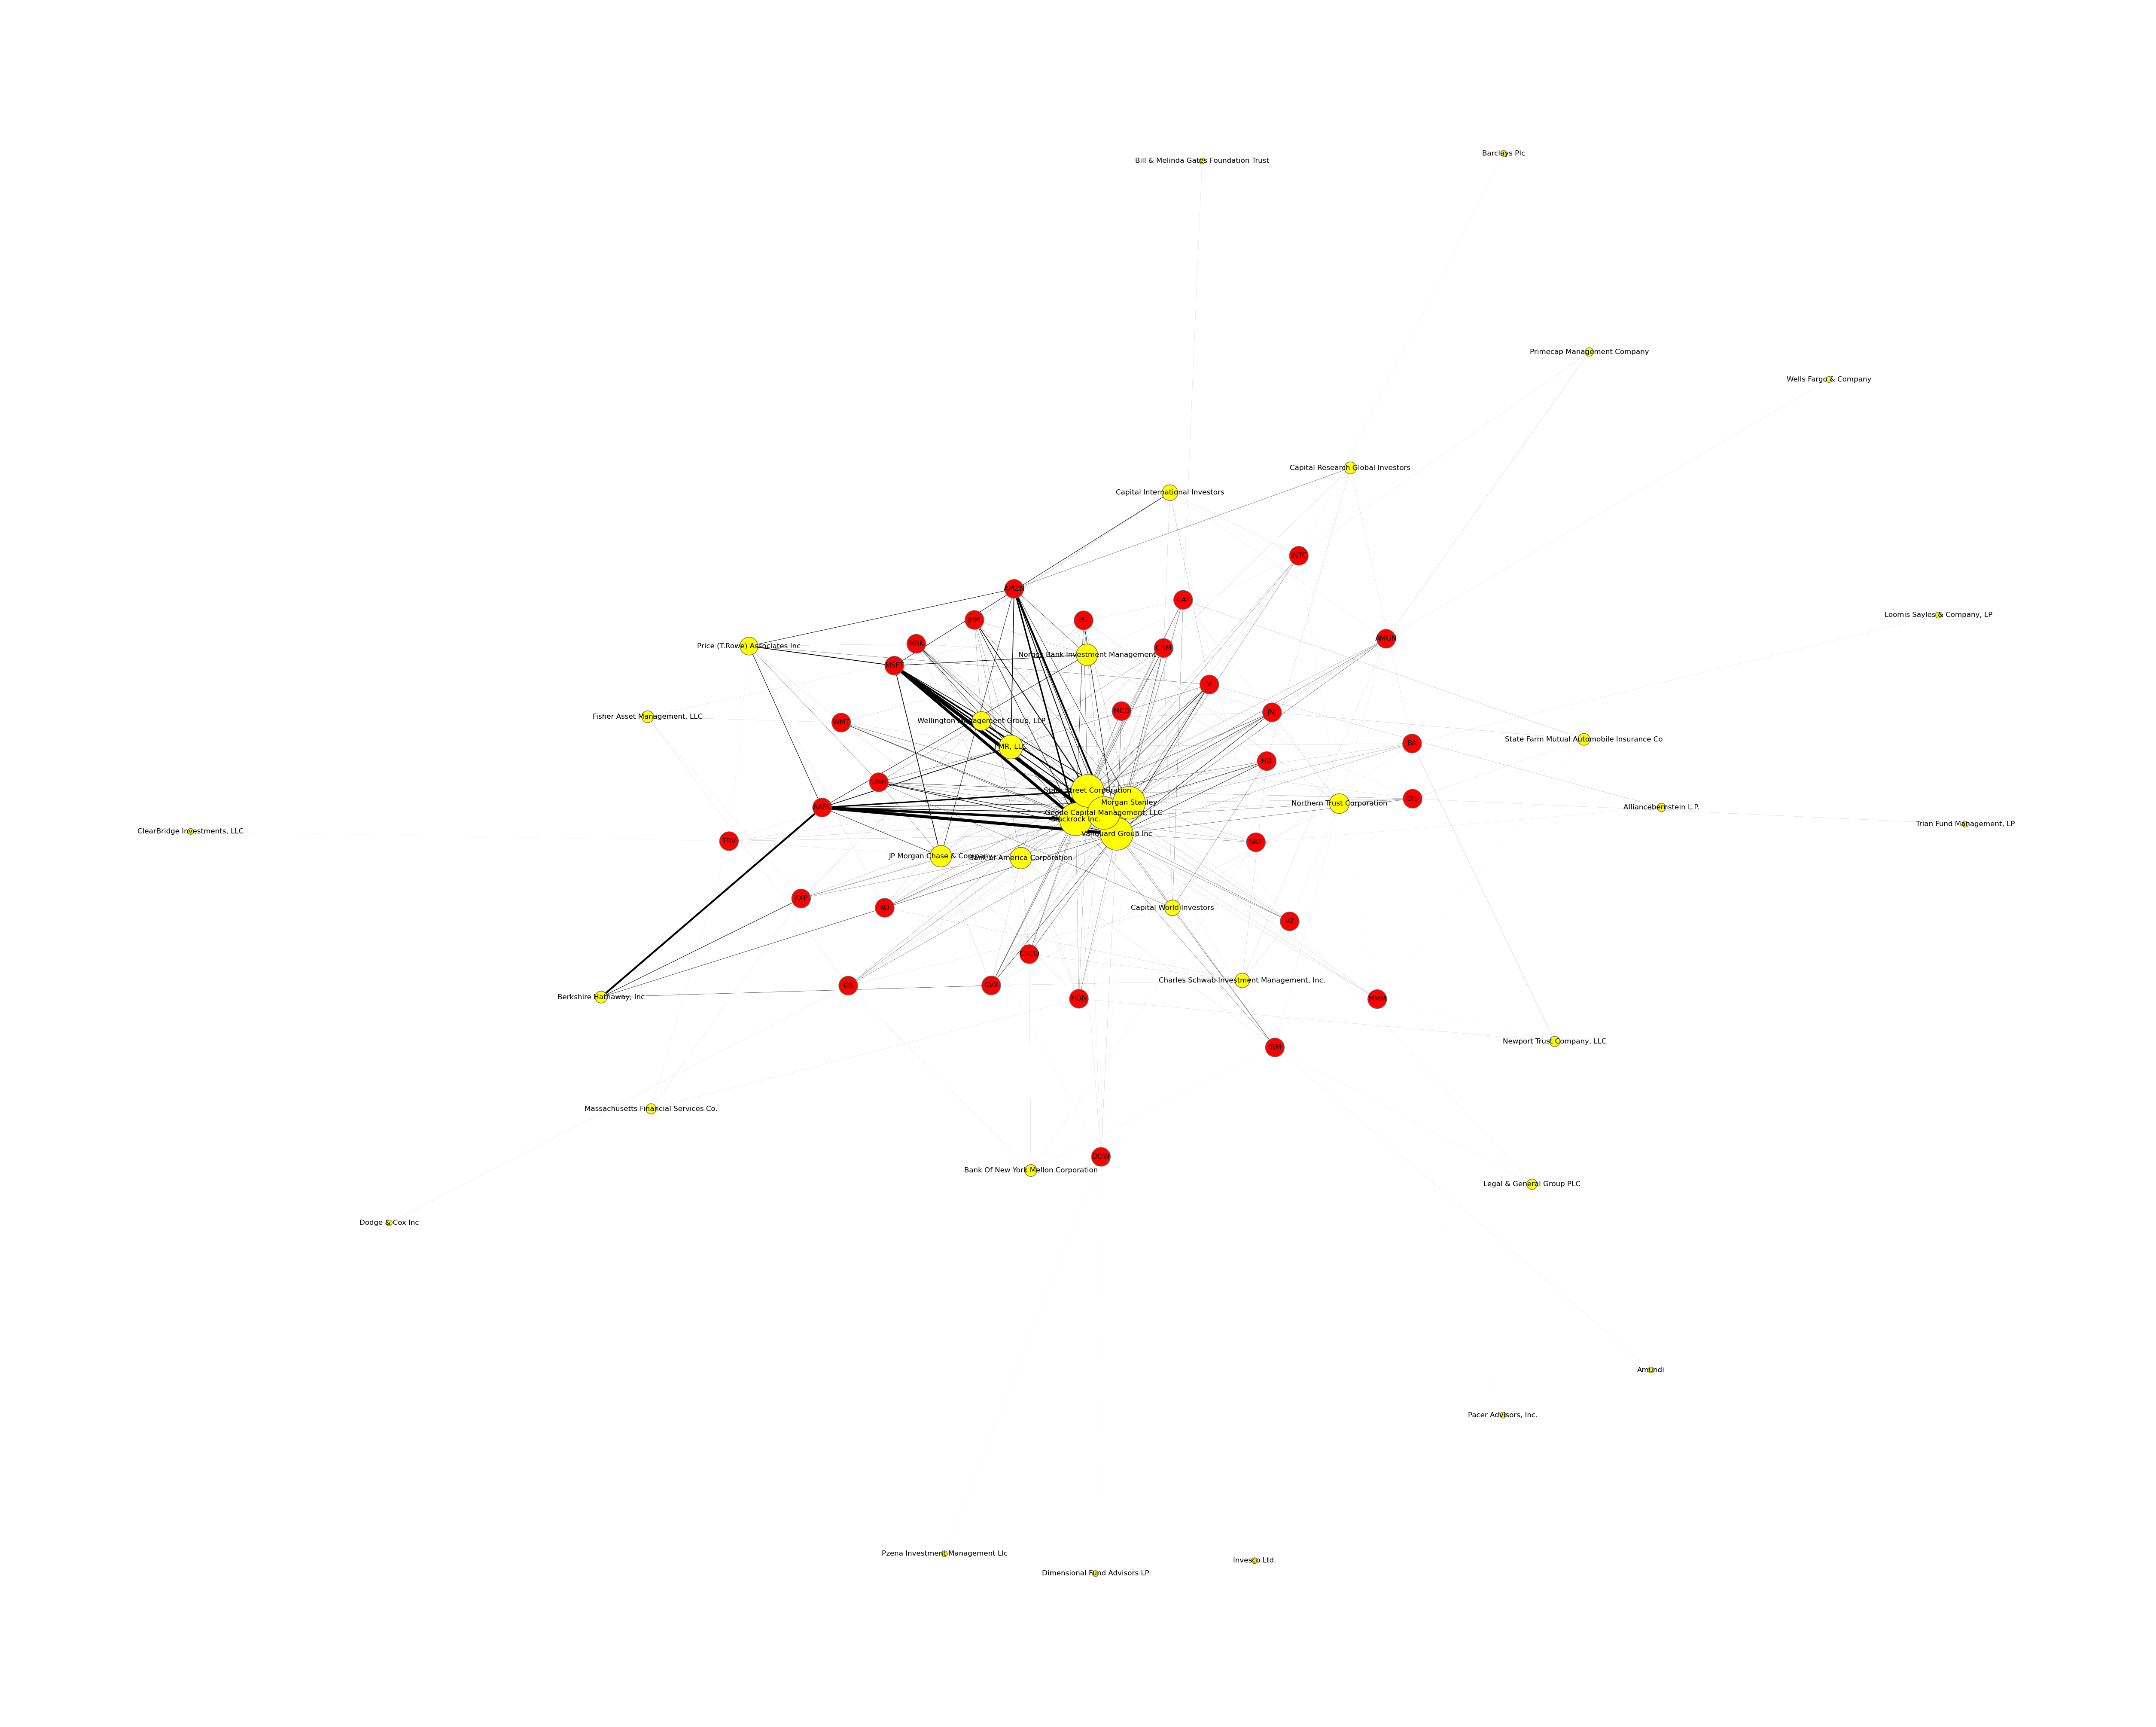

In [57]:
plt.figure(figsize=(50,40))
nx.draw(G,with_labels=True,node_color=colors,node_size=[v * 100 for v in dict(G.degree()).values() ],
        width= [v[2]['Value']/50_000_000_000 for v in edgelist])
ax=plt.gca()
ax.collections[0].set_edgecolor('#696969')